In [2]:
# librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

1. data cleaning & EDA

In [3]:
# importing data
df=pd.read_csv("insurance_claims.csv")
#df.info()
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,415,52,794731,22-02-15,IN,250/500,1000,973.50,0,468634,...,YES,51090,7860,7860,35370,Toyota,Highlander,2003,N,NaN
1,89,32,266247,17-01-15,IN,100/300,2000,1482.53,0,620358,...,?,100,10,20,70,Audi,A3,2002,N,NaN
2,180,36,420948,03-01-15,IL,100/300,500,1272.46,0,456959,...,?,69630,12660,6330,50640,Toyota,Corolla,1998,N,NaN
3,160,37,921202,28-12-14,OH,500/1000,500,1374.22,0,472135,...,NO,72930,6630,13260,53040,Accura,TL,2015,N,NaN
4,256,43,883980,13-12-14,OH,100/300,500,1203.17,0,455810,...,?,63250,11500,5750,46000,Nissan,Ultima,1997,N,NaN


In [4]:
# replacing missing values represented by '?' with np.nan
df.replace('?', np.nan, inplace = True)

In [5]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

1.1 Data preprocessing

In [7]:
# missing values
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [8]:
print(df['collision_type'].unique())
print(df['property_damage'].unique())
print(df['police_report_available'].unique())
print(df['authorities_contacted'].unique())

['Rear Collision' nan 'Front Collision' 'Side Collision']
['YES' 'NO' nan]
['YES' nan 'NO']
['Police' 'Ambulance' 'Other' 'Fire' nan]


In [9]:
# handling missing values

# for these columns, we replace the missing values with the mode 
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

# for the column 'authorities_contacted', it seems that the np.nan values are from the people that didn't contact 
# any authorities, so we replace the missing values with the category 'None'
df['authorities_contacted'] = df['authorities_contacted'].fillna('None')

# the column '_c39' is completely empty so we can drop it
df = df.drop(columns=['_c39'])

In [10]:
df.isna().sum()
# no more missing values :)

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

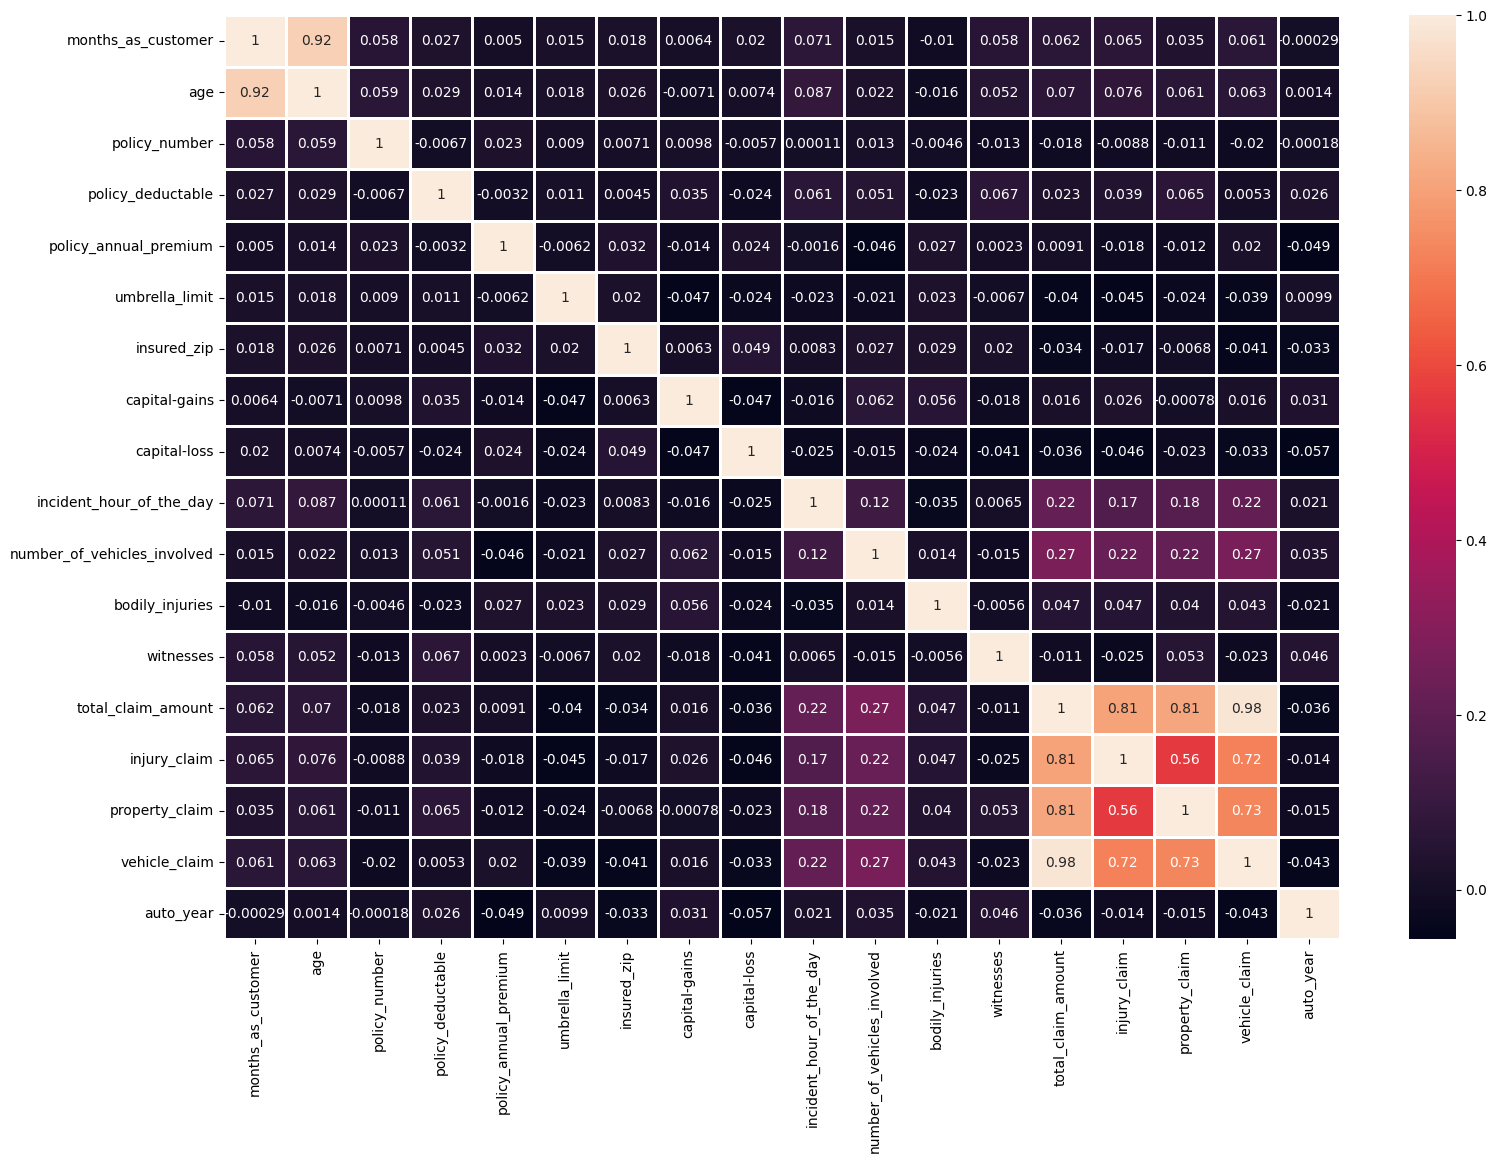

In [11]:
# correlation matrix
df_numeric = df.select_dtypes(include=[np.number])
corr = df_numeric.corr()
plt.figure(figsize = (18, 12))
sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [12]:
# from the correlation matrix, we can see that we get can get rid of 'age' bc high colinearity (>0.9) with
# 'months_as_customer', so we keep the latter

# we also get rid of total_claim_amount since it's the total amount of injury_claim, property_claim and vehicle_claim.
# high colinearity (>0.8)
df.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)

In [13]:
df.nunique()

months_as_customer              391
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage                   2
bodily_injuries             

In [14]:
# removing unnecessary columns for prediction 
to_drop = ['policy_number','policy_bind_date','insured_zip','incident_location','incident_date','auto_model']

df.drop(to_drop, inplace = True, axis = 1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   policy_state                 1000 non-null   object 
 2   policy_csl                   1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   object 
 7   insured_education_level      1000 non-null   object 
 8   insured_occupation           1000 non-null   object 
 9   insured_hobbies              1000 non-null   object 
 10  insured_relationship         1000 non-null   object 
 11  capital-gains                1000 non-null   int64  
 12  capital-loss                 1000 non-null   int64  
 13  incident_type      

In [16]:
# separating the target and feature variables
X = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

1.2 Encoding variables

In [17]:
# categorical variables
categ_df = X.select_dtypes(include = ['object'])
categ_df = pd.get_dummies(categ_df, drop_first = True)
categ_df.head()
categ_df = categ_df.astype(int)

# numerical variables
num_df = X.select_dtypes(include = ['int64', 'float64'])

# we combine the the two
X = pd.concat([num_df, categ_df], axis = 1)
X.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen
0,415,1000,973.50,0,50400,0,15,2,1,3,...,0,0,0,0,0,0,0,0,1,0
1,89,2000,1482.53,0,49100,-45100,5,1,1,2,...,0,0,0,0,0,0,0,0,0,0
2,180,500,1272.46,0,0,0,7,3,2,1,...,0,0,0,0,0,0,0,0,1,0
3,160,500,1374.22,0,45500,-37800,19,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,256,500,1203.17,0,56700,-65600,11,1,0,0,...,0,0,0,0,0,1,0,0,0,0


C:\Users\D\AppData\Local\Temp\ipykernel_13600\1681007545.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col])
C:\Users\D\AppData\Local\Temp\ipykernel_13600\1681007545.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col])
C:\Users\D\AppData\Local\Temp\ipykernel_13600\1681007545.py:7:

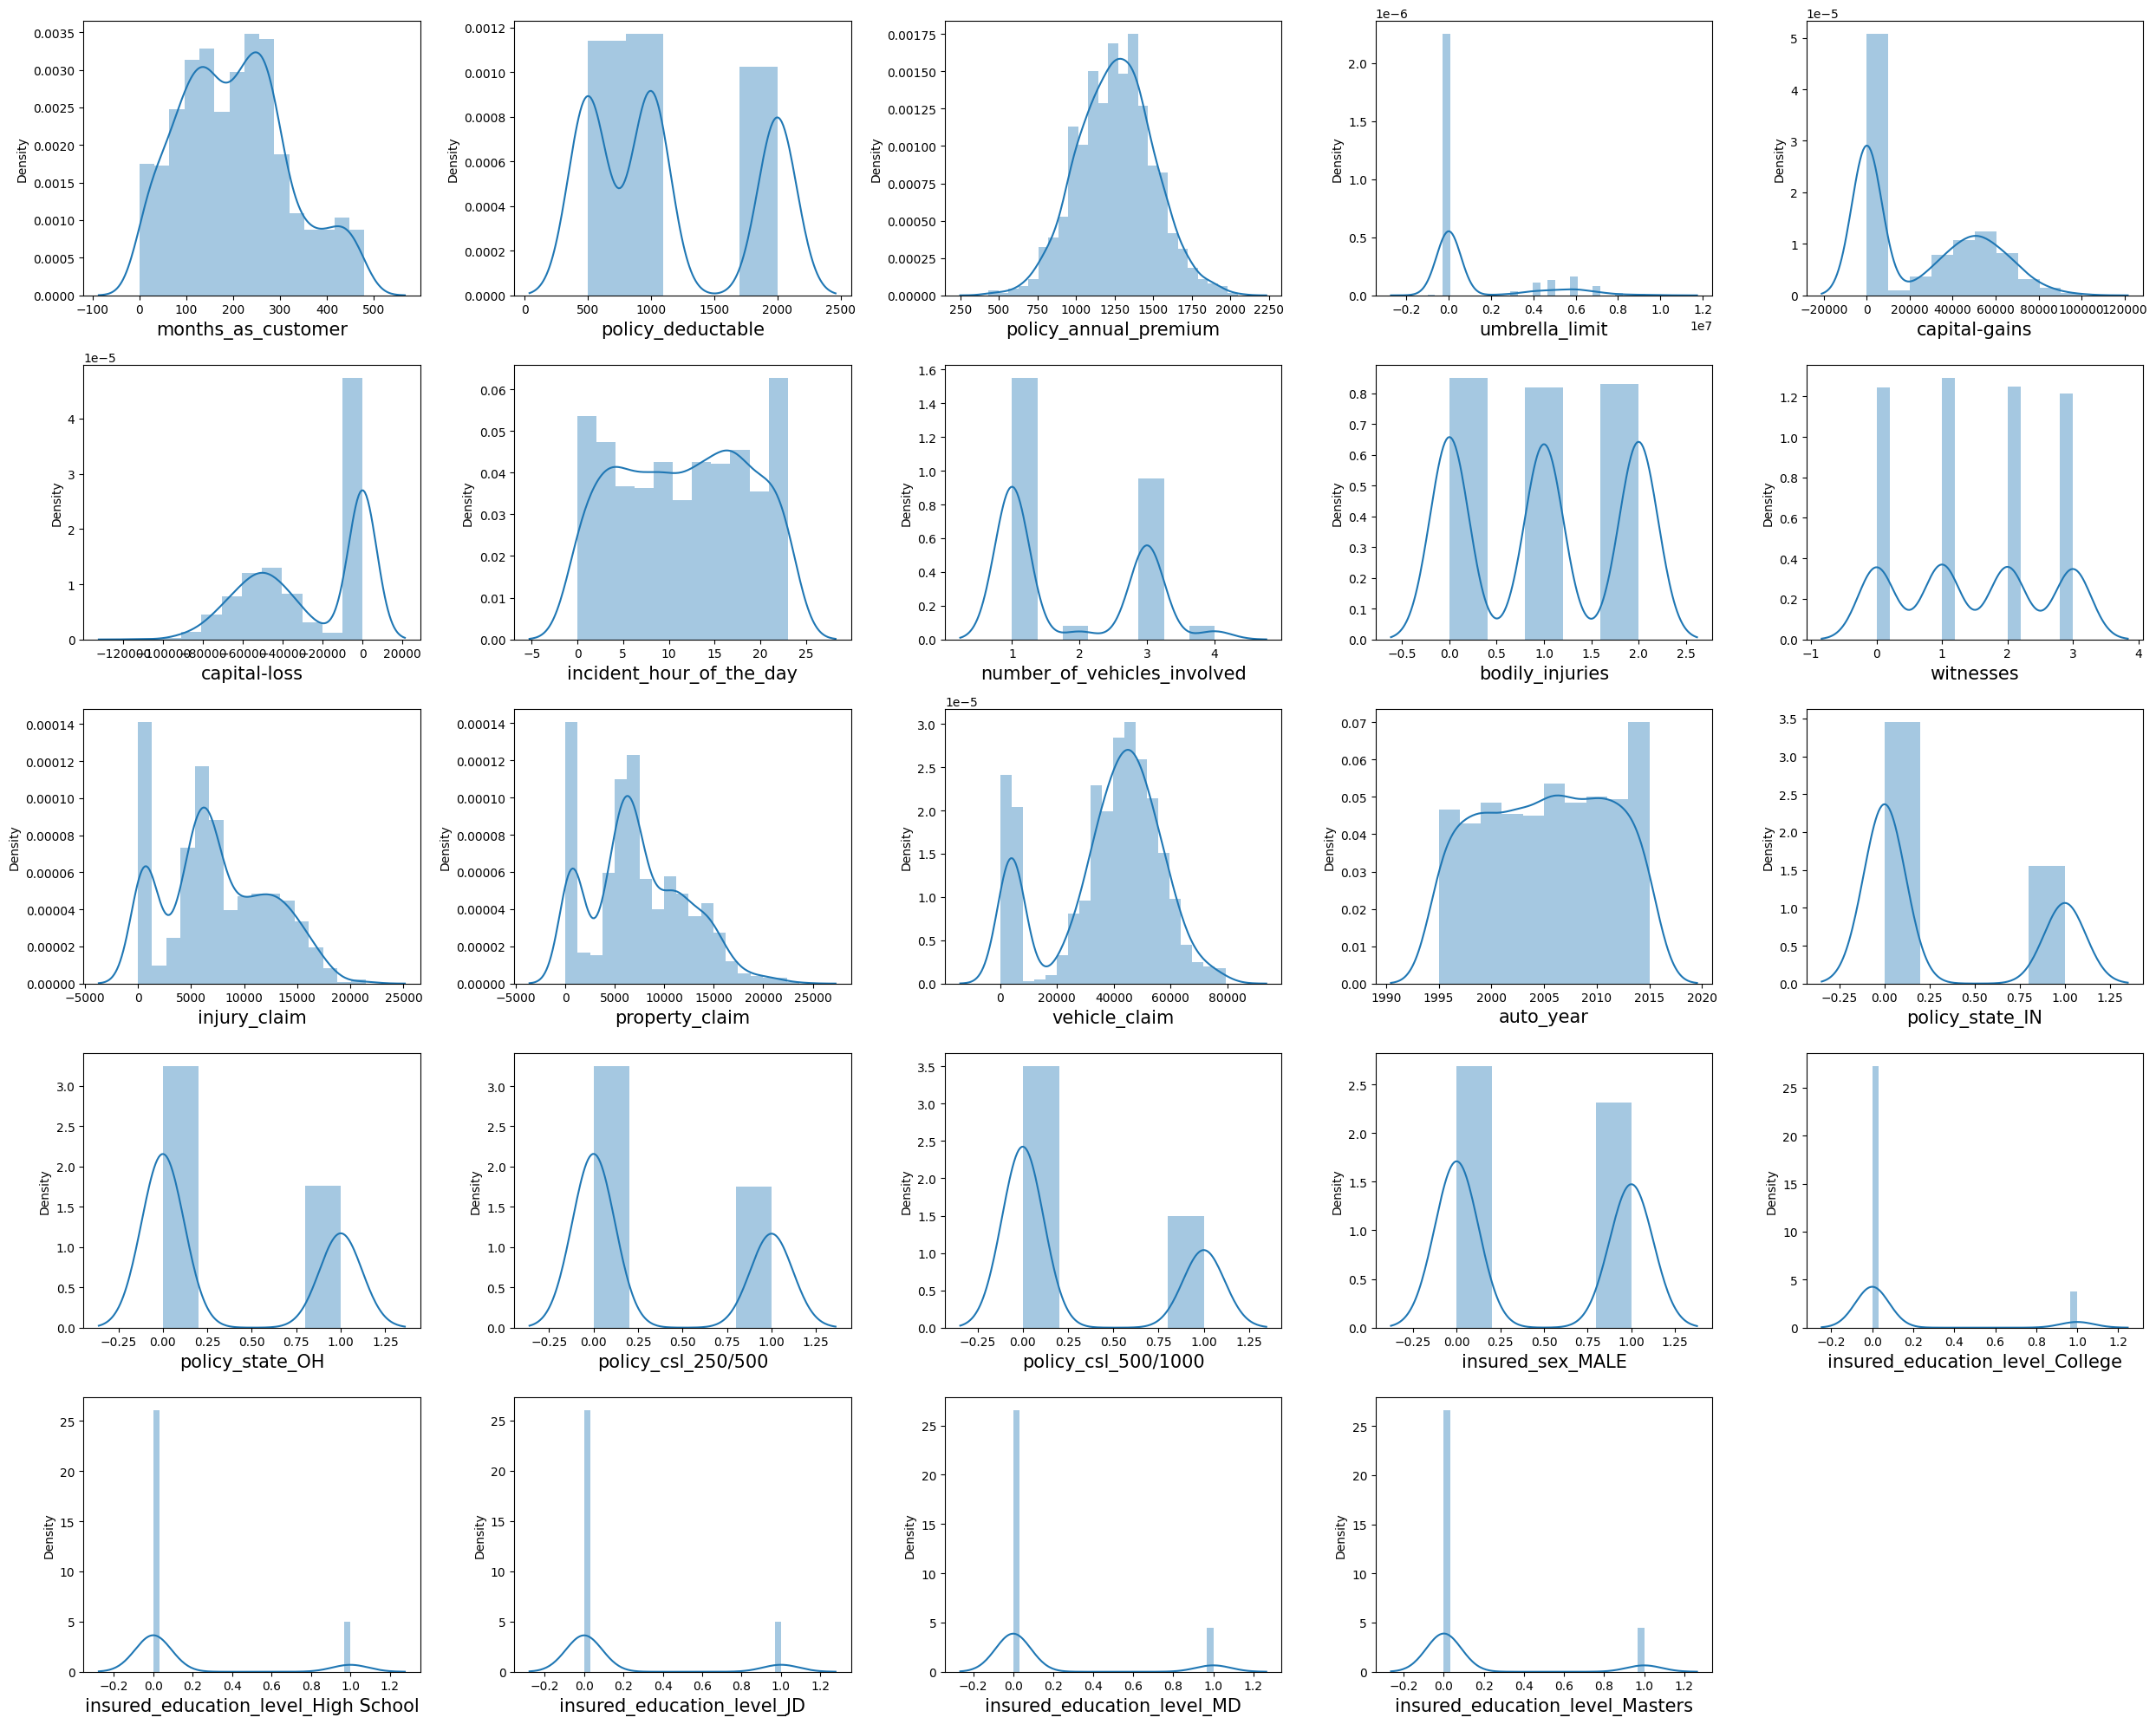

In [18]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

1.3 Outliers

C:\Users\D\AppData\Local\Temp\ipykernel_13600\3664494132.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proportions.index, y=proportions.values, palette="pastel")
C:\Users\D\AppData\Local\Temp\ipykernel_13600\3664494132.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proportions.index, y=proportions.values, palette="pastel")
C:\Users\D\AppData\Local\Temp\ipykernel_13600\3664494132.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proportions.index, y=proportions.values, palette="pastel")
C:\Users\D\AppData\Local\Temp\ipyk

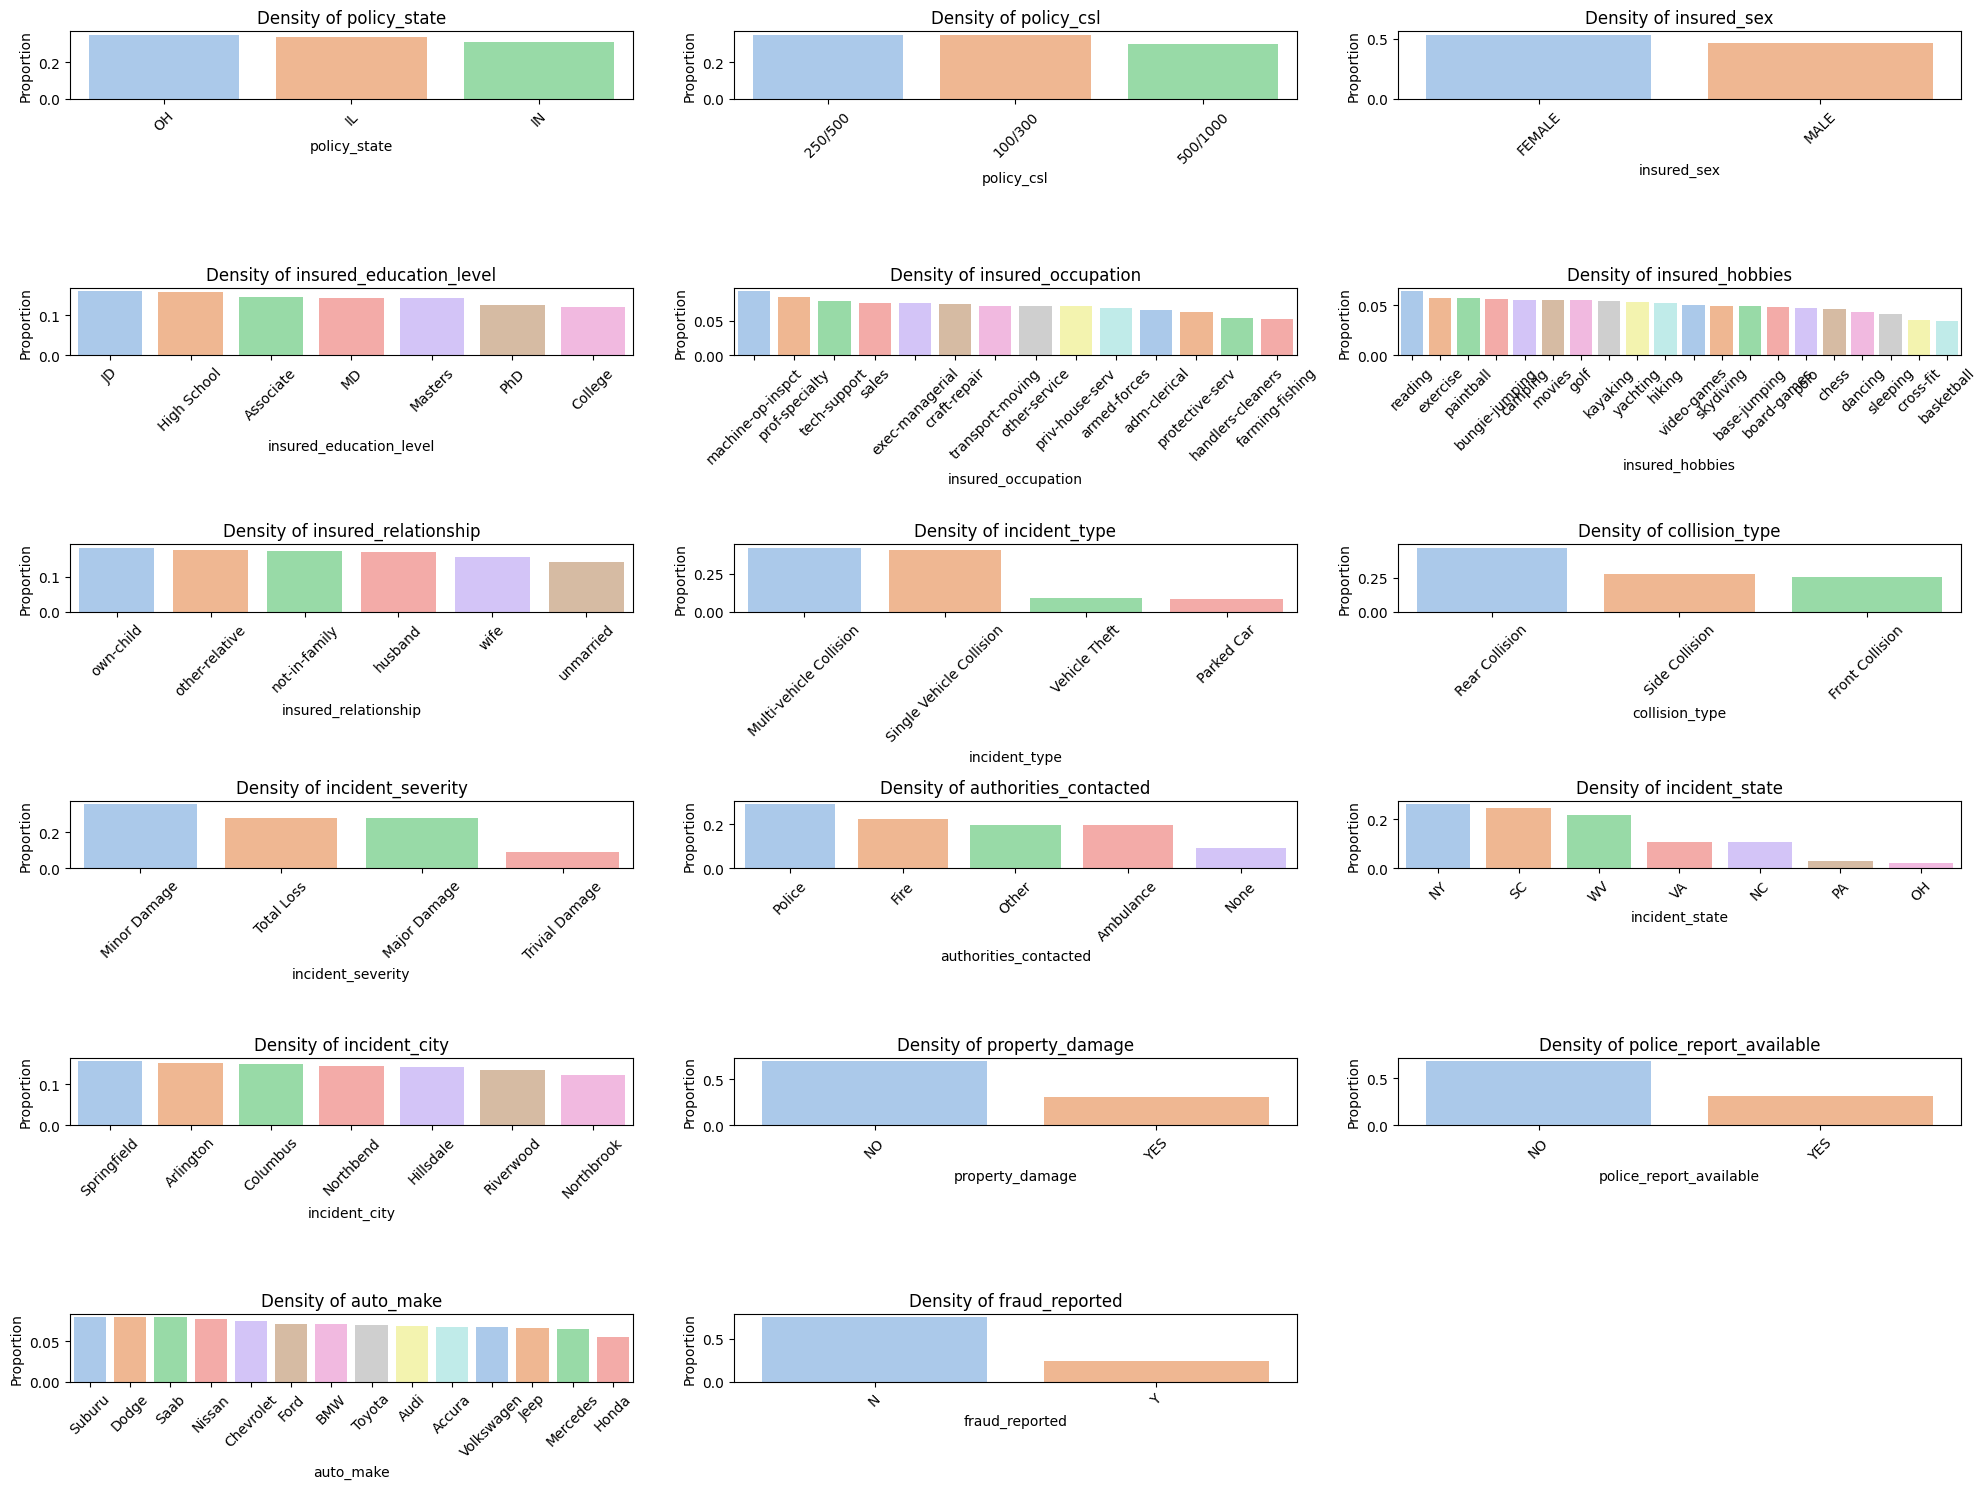

In [19]:
# checking categorical columns: density bar plot
cat_cols = df.select_dtypes(include=['category', 'object']).columns
plt.figure(figsize=(20, 15))

num_plots = len(cat_cols)
num_rows = math.ceil(num_plots / 3)

for i, col in enumerate(cat_cols):
    plt.subplot(num_rows, 3, i + 1)
    proportions = df[col].value_counts(normalize=True)
    sns.barplot(x=proportions.index, y=proportions.values, palette="pastel") 
    plt.title(f'Density of {col}')
    plt.xlabel(col)
    plt.ylabel('Proportion')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# the target variable is imbalanced

Index(['months_as_customer', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'capital-gains', 'capital-loss',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim', 'auto_year'],
      dtype='object')


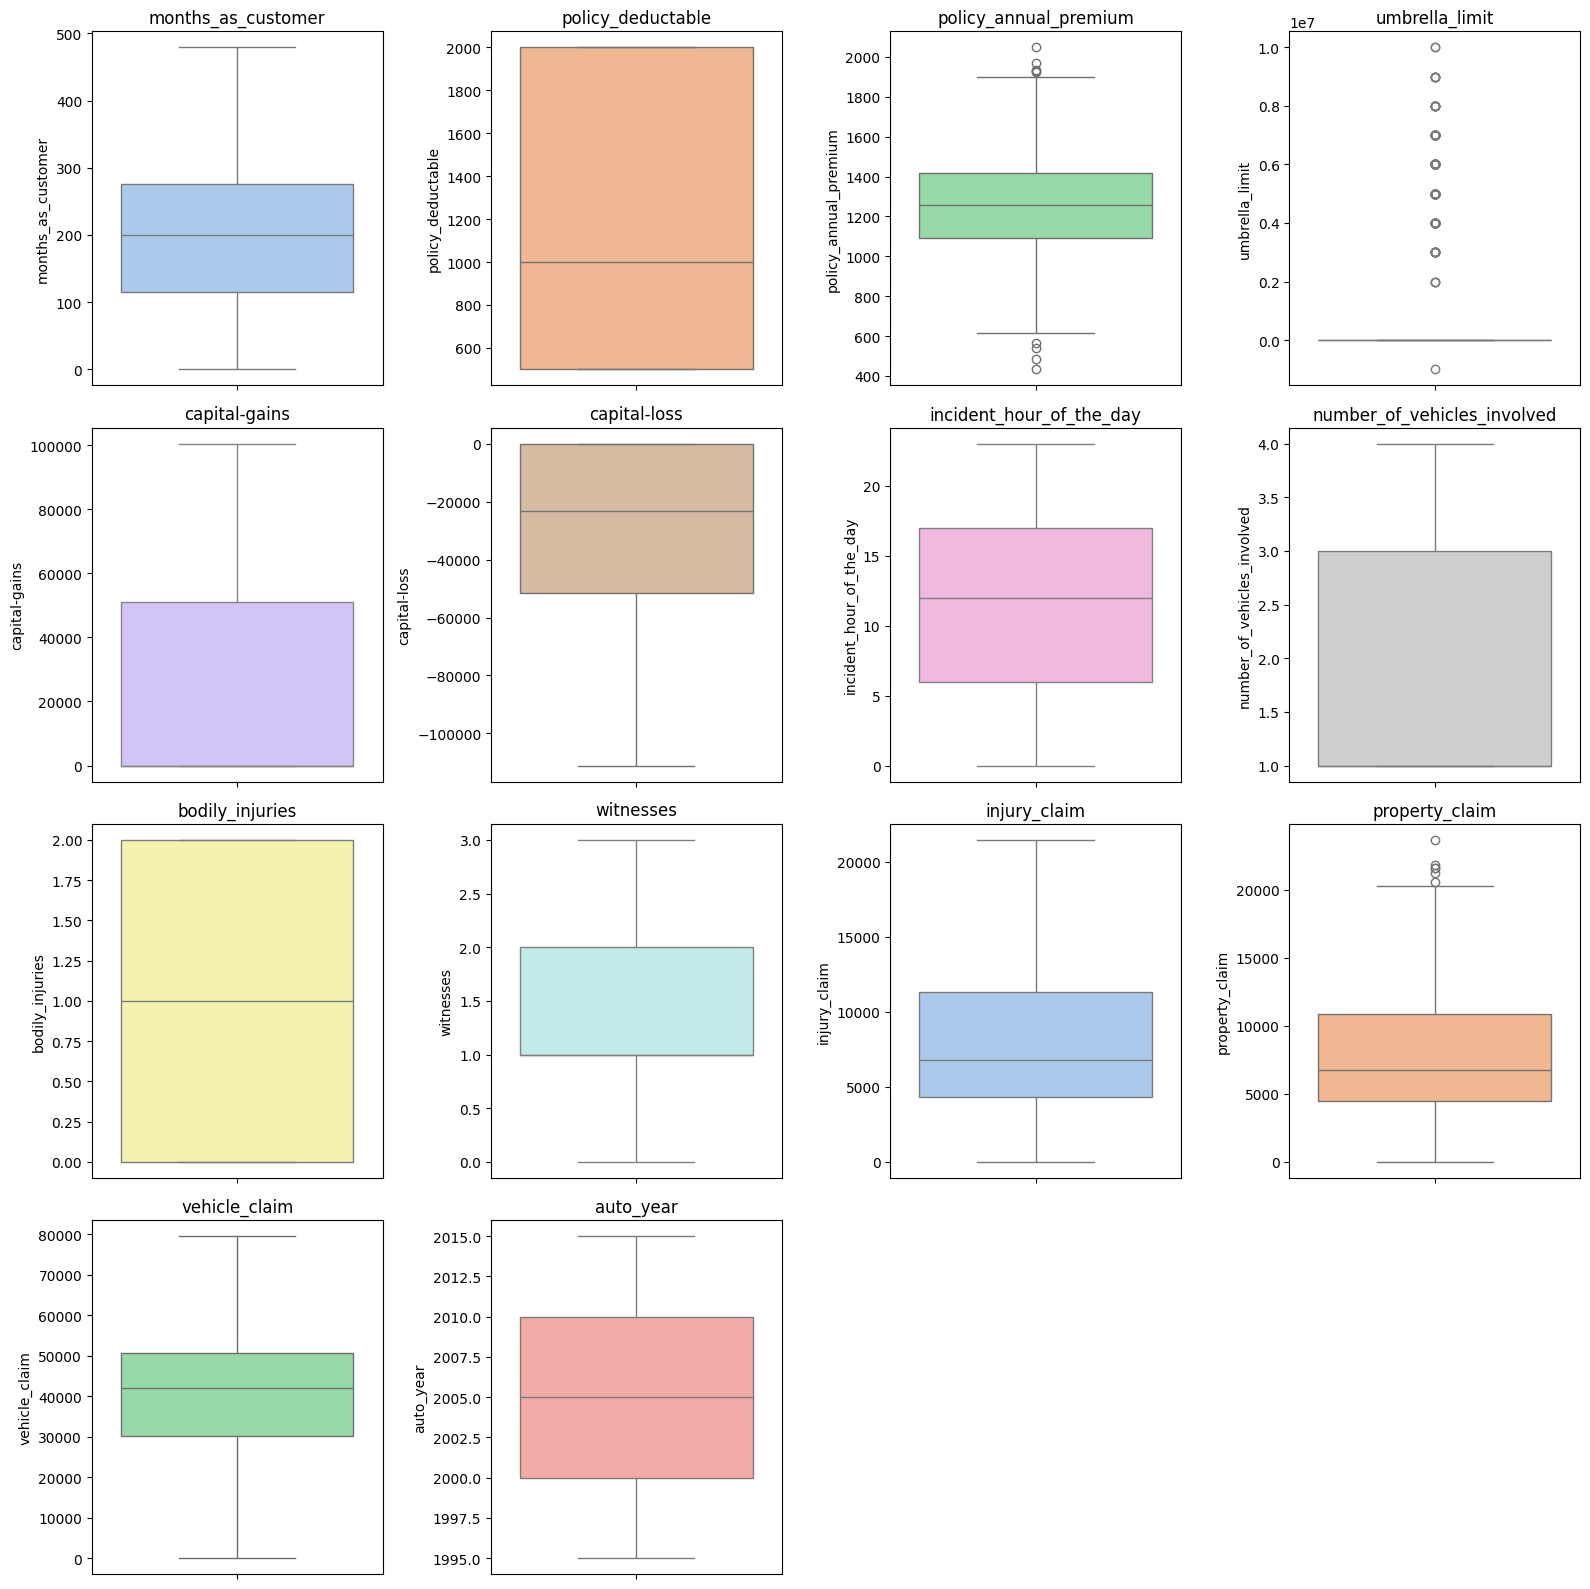

In [20]:
# checking numerical columns : box plot
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
print(num_cols)

pastel_colors = sns.color_palette("pastel", len(num_cols))
plt.figure(figsize=(16, 16))  
for i, col in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df[col], color=pastel_colors[i]) 
    plt.title(col)

plt.tight_layout()  
plt.show()

# some outliers in numerical variables, but we will scale later

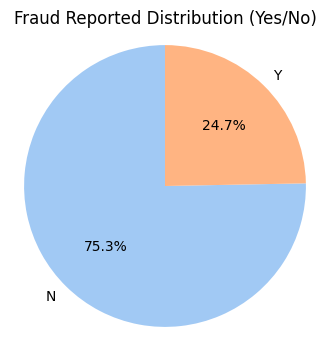

In [21]:
# checking the target variable
class_counts = y.value_counts()
plt.figure(figsize=(4, 4))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Fraud Reported Distribution (Yes/No)')
plt.axis('equal') 
plt.show()

1.4 Splitting train-test

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [23]:
X_train.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen
82,222,1000,1226.78,0,49600,-49200,17,2,2,0,...,0,0,0,0,0,0,0,0,0,0
991,129,1000,1377.94,0,0,0,23,1,2,3,...,0,0,0,0,0,0,0,0,1,0
789,200,2000,1318.06,0,57300,-80600,13,1,0,3,...,0,0,0,0,0,0,0,0,0,1
894,41,1000,1226.83,0,0,-56100,12,3,2,0,...,0,0,0,0,0,0,0,0,0,0
398,267,2000,1546.01,0,0,0,4,4,2,1,...,0,0,0,0,0,0,0,0,0,1


In [24]:
# scaling numerical columns 
num_cols = ['months_as_customer', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
            'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 
            'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']
num_df = X_train[num_cols]  
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(num_df) 
print(X_train[num_cols].head())

     months_as_customer  policy_deductable  policy_annual_premium  \
82             0.167379          -0.217425              -0.105231   
991           -0.628876          -0.217425               0.523984   
789           -0.020982           1.429737               0.274729   
894           -1.382321          -0.217425              -0.105022   
398            0.552664           1.429737               1.223588   

     umbrella_limit  capital-gains  capital-loss  incident_hour_of_the_day  \
82        -0.487857       0.874638     -0.785259                  0.765152   
991       -0.487857      -0.902402      0.964979                  1.628537   
789       -0.487857       1.150509     -1.902282                  0.189561   
894       -0.487857      -0.902402     -1.030720                  0.045664   
398       -0.487857      -0.902402      0.964979                 -1.105517   

     number_of_vehicles_involved  bodily_injuries  witnesses  injury_claim  \
82                      0.163833      

In [25]:
X_train.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen
82,0.167379,-0.217425,-0.105231,-0.487857,0.874638,-0.785259,0.765152,0.163833,1.198210,-1.338895,...,0,0,0,0,0,0,0,0,0,0
991,-0.628876,-0.217425,0.523984,-0.487857,-0.902402,0.964979,1.628537,-0.819166,1.198210,1.379980,...,0,0,0,0,0,0,0,0,1,0
789,-0.020982,1.429737,0.274729,-0.487857,1.150509,-1.902282,0.189561,-0.819166,-1.237176,1.379980,...,0,0,0,0,0,0,0,0,0,1
894,-1.382321,-0.217425,-0.105022,-0.487857,-0.902402,-1.030720,0.045664,1.146832,1.198210,-1.338895,...,0,0,0,0,0,0,0,0,0,0
398,0.552664,1.429737,1.223588,-0.487857,-0.902402,0.964979,-1.105517,2.129831,1.198210,-0.432603,...,0,0,0,0,0,0,0,0,0,1


In [26]:
y_train.head()

82     N
991    N
789    N
894    Y
398    N
Name: fraud_reported, dtype: object

In [27]:
y_train=y_train.map({'Y':1, 'N':0})
y_test=y_test.map({'Y':1, 'N':0})

2. Machine Learning models

2.1 Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

logreg = LogisticRegression(max_iter=1000, class_weight='balanced')
# we use balanced because helps the model not be biased toward predicting the majority class +the minority 
# class (fraud detected) is more important to identify correctly
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(y_pred)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')



[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
Accuracy: 0.28
Precision: 0.26
Recall: 1.00
F1 Score: 0.41


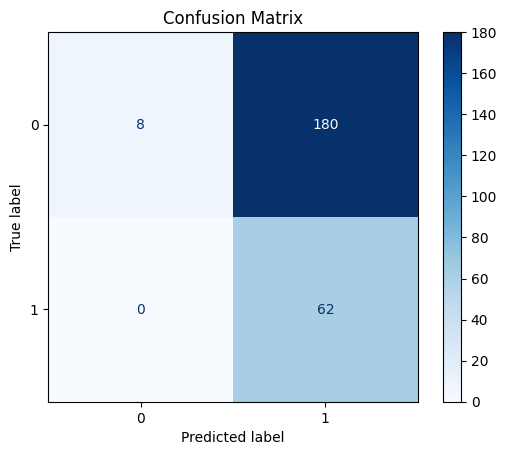

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = logreg.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

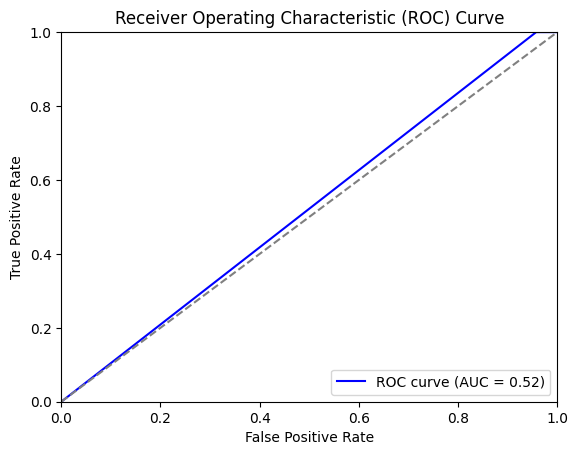

In [41]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_proba = logreg.predict_proba(X_test)[:, 1]  

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# model has very low accuracy (0.28) and precision (0.26), despite perfect recall (1.00), indicating it predicts positives 
# excessively, leading to many false positives. The ROC AUC of 0.52 shows near-random classification ability.
# => not a good model

2.2 Random Forest

Accuracy: 0.75
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
ROC AUC: 0.80


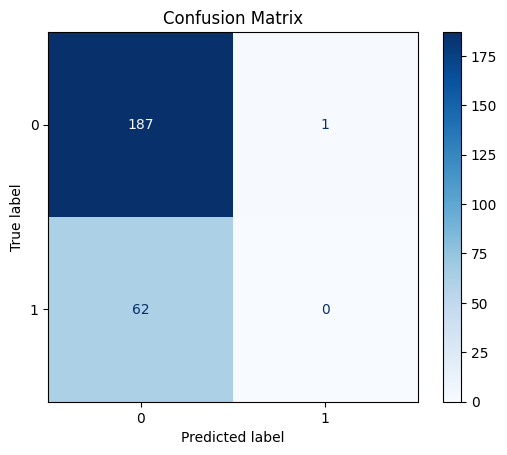

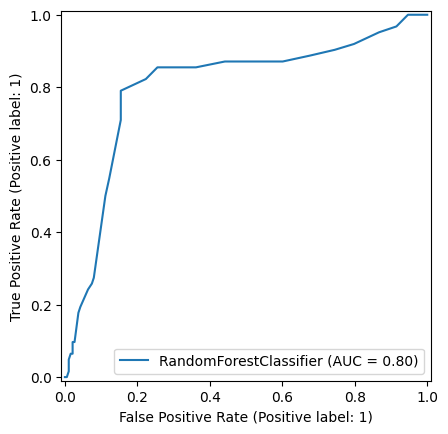

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, RocCurveDisplay

rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.show()

2.3 XGBoost Classifier

In [28]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train))
xgb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of XgBoost is : {xgb_train_acc}")
print(f"Test accuracy of XgBoost is : {xgb_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#  Class 0: High precision (0.80) and recall (0.95).
#  Class 1: Lower precision (0.63) and low recall (0.27).
# F1-Score: Overall lower F1 for class 1 (0.38), indicating poor performance for this class.
# -> High training accuracy but lower test accuracy and poor performance for class 1, especially with low 
# recall (model may be overfitting)

Training accuracy of XgBoost is : 1.0
Test accuracy of XgBoost is : 0.78
[[178  10]
 [ 45  17]]
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       188
           1       0.63      0.27      0.38        62

    accuracy                           0.78       250
   macro avg       0.71      0.61      0.62       250
weighted avg       0.76      0.78      0.75       250



Fitting 5 folds for each of 64 candidates, totalling 320 fits


d:\test\outils\projets\pythonenvironment\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:51:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


Training accuracy of XgBoost is : 0.9293333333333333
Test accuracy of XgBoost is : 0.772
[[138  50]
 [  7  55]]
              precision    recall  f1-score   support

           0       0.95      0.73      0.83       188
           1       0.52      0.89      0.66        62

    accuracy                           0.77       250
   macro avg       0.74      0.81      0.74       250
weighted avg       0.85      0.77      0.79       250



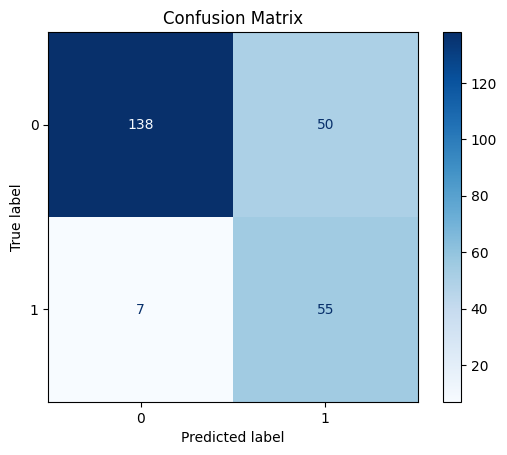

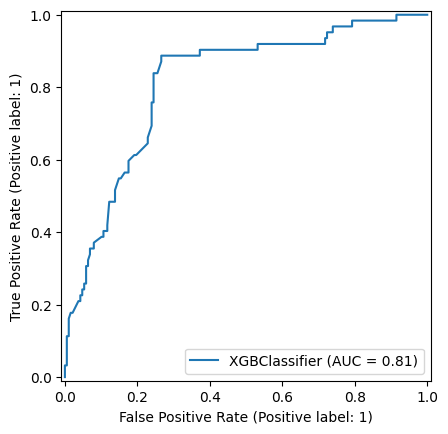

In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators": [10, 50, 100, 130], "criterion": ['gini', 'entropy'],
                               "max_depth": range(2, 10, 1)}

grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5,  verbose=3,n_jobs=-1)
grid.fit(X_train, y_train)

# best estimator 

xgb = grid.best_estimator_

y_pred = xgb.predict(X_test)

xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train))
xgb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of XgBoost is : {xgb_train_acc}")
print(f"Test accuracy of XgBoost is : {xgb_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Precision and Recall:
# Class 0: Higher precision (0.95) and moderate recall (0.73).
# Class 1: Moderate precision (0.52) and high recall (0.89).
# Better F1-score for both classes, especially for class 1, which has a balanced precision and recall.
# Conclusion: Although the test accuracy is slightly lower, the model in Option 2 generalizes better, 
# with a lower training accuracy (less likely overfitting) and balanced performance on both classes, as indicated by 
# the F1-scores.

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

RocCurveDisplay.from_estimator(xgb, X_test, y_test)
plt.show()